## Name: Baraka Mandi

#### Q7. Build a Decision Tree (sklearn)

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

for depth in [1, 2, 3]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    
    print(f"Max Depth {depth}: Train Acc = {train_acc:.3f}, Test Acc = {test_acc:.3f}")

Max Depth 1: Train Acc = 0.648, Test Acc = 0.711
Max Depth 2: Train Acc = 0.943, Test Acc = 0.978
Max Depth 3: Train Acc = 0.952, Test Acc = 1.000


##### Discussion: 

Max Depth 1: Underfitting; the model is too simple to capture the patterns (low train and test accuracy)

Max Depth 3: Best result, showing 100% accurate predictions on test data

Overfitting would occur if max_depth was very high, resulting in 100% training accuracy but declining test accuracy. In our case Training Accuracy is not 100% while testing accuracy is 100% showing that this is not overfitting but rather the model producing very good results

#### Q8. kNN Classification & Decision Boundaries

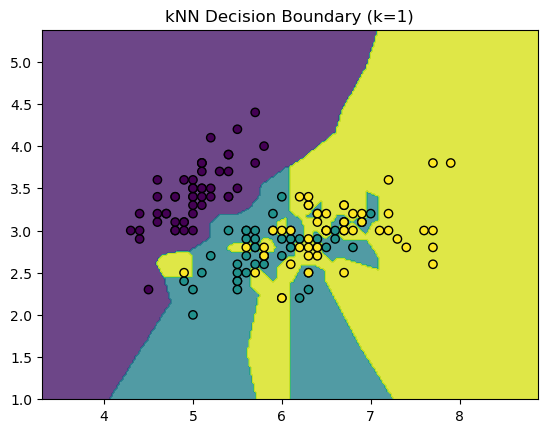

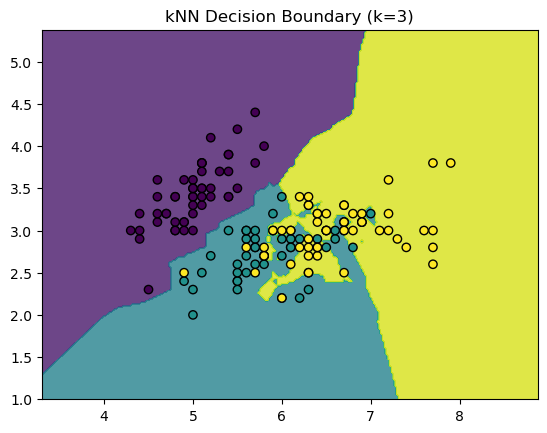

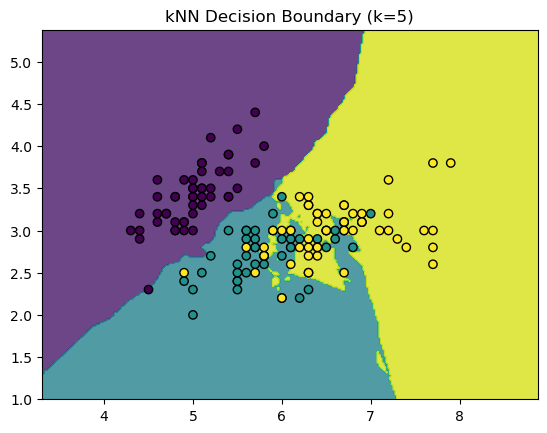

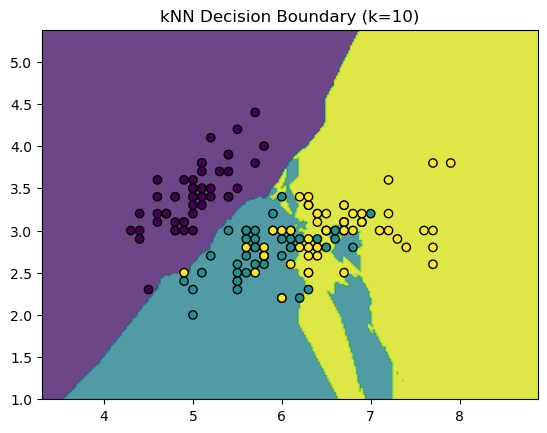

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

X = iris.data[:, :2] # Sepal length, Sepal width
y = iris.target

h = .02 # Mesh step size
for k in [1, 3, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    # Create mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(f"kNN Decision Boundary (k={k})")
    plt.show()

#### Comments

At k=1, the boundaries are very jagged and sensitive to individual data points (high variance). As k increases, the boundaries become smoother and more generalized (lower variance)

#### Q9. Performance Evaluation

--- Performance Evaluation for k=5 ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.90      0.95        10
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



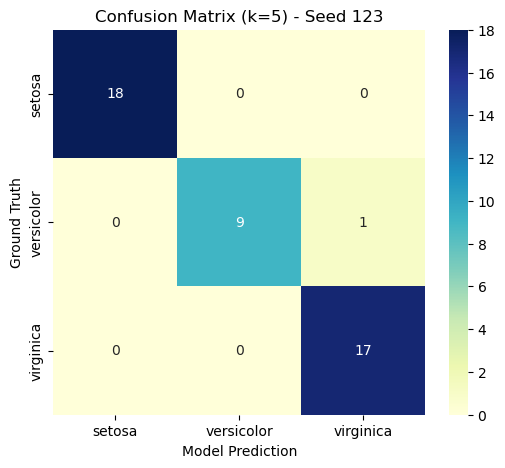

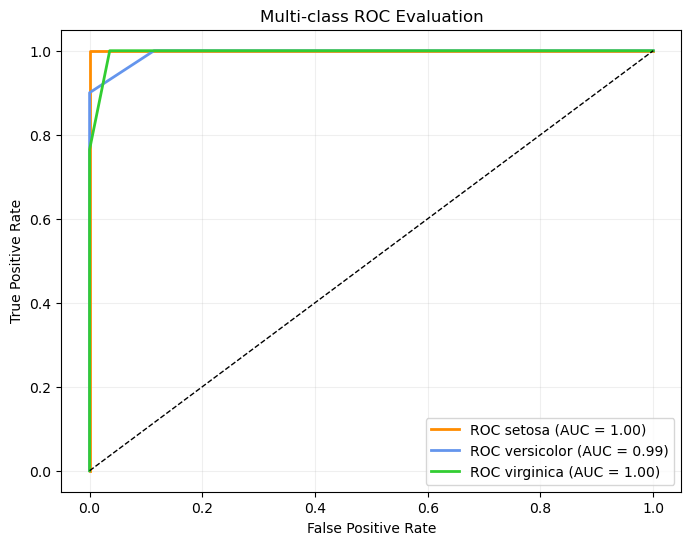

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

# 1. Load data with unique naming to prevent variable collision
iris_data_bundle = load_iris()
features_matrix = iris_data_bundle.data
target_vector = iris_data_bundle.target
category_names = iris_data_bundle.target_names

# 2. Use a different random_state (123)
train_X, test_X, train_y, test_y = train_test_split(
    features_matrix, target_vector, test_size=0.3, random_state=123
)

# 3. Initialize and train the neighbor-based classifier
k_value = 5
iris_knn_model = KNeighborsClassifier(n_neighbors=k_value)
iris_knn_model.fit(train_X, train_y)

# 4. Generate predictions and probability scores
y_test_predictions = iris_knn_model.predict(test_X)
y_test_probabilities = iris_knn_model.predict_proba(test_X)

# --- Q9 Performance Metrics Output ---
print(f"--- Performance Evaluation for k={k_value} ---")
print(classification_report(test_y, y_test_predictions, target_names=category_names))

# A. Confusion Matrix
eval_confusion_mat = confusion_matrix(test_y, y_test_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(eval_confusion_mat, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=category_names, yticklabels=category_names)
plt.title(f'Confusion Matrix (k={k_value}) - Seed 123')
plt.ylabel('Ground Truth')
plt.xlabel('Model Prediction')
plt.show()



# B. Multi-class ROC Curve
# Binarize labels for area calculation
binarized_test_y = label_binarize(test_y, classes=[0, 1, 2])
total_classes = 3

false_pos_rate = dict()
true_pos_rate = dict()
area_under_curve = dict()

for idx in range(total_classes):
    false_pos_rate[idx], true_pos_rate[idx], _ = roc_curve(binarized_test_y[:, idx], y_test_probabilities[:, idx])
    area_under_curve[idx] = auc(false_pos_rate[idx], true_pos_rate[idx])

plt.figure(figsize=(8, 6))
line_colors = ['darkorange', 'cornflowerblue', 'limegreen']
for idx, color in zip(range(total_classes), line_colors):
    plt.plot(false_pos_rate[idx], true_pos_rate[idx], color=color, lw=2,
             label=f'ROC {category_names[idx]} (AUC = {area_under_curve[idx]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Evaluation')
plt.legend(loc="lower right")
plt.grid(alpha=0.2)
plt.show()

#### Comments

ROC Curve & AUC:  The Area Under the Curve (AUC) measures the ability of the classifier to distinguish between classes.

An AUC of 1.0 is a perfect classifier.

An AUC of 0.5 (the dashed diagonal line) represents a model that is no better than random guessing.

In the Iris dataset, you will see an AUC of 1 for setosa, 0.99 for versicolor and 1 for virginica meaning that the prediction is very accurate